### Time series

In [9]:
import os
os.chdir("E:\\my_analysis")
os.listdir()

['datac.csv']

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#loading the data
data = pd.read_csv("datac.csv")

In [12]:
# checking data types
#data.info() 
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,25.620001,25.620001,25.00,25.270000,23.908045,74300
1,2020-01-03,25.059999,25.510000,25.00,25.430000,24.059420,81800
2,2020-01-06,25.340000,25.730000,25.16,25.690001,24.305405,77600
3,2020-01-07,25.709999,26.040001,25.27,25.320000,23.955347,94400
4,2020-01-08,25.200001,25.320000,25.02,25.280001,23.917505,66000


In [14]:
#summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1019.0,32.808018,10.665549,14.040000,24.554999,31.620001,38.350001,65.910004
High,1019.0,33.315339,10.798406,14.320000,25.025001,31.990000,38.830000,66.330002
Low,1019.0,32.278675,10.564653,13.540000,24.225000,31.020000,37.845001,64.830002
Close,1019.0,32.776055,10.671475,13.800000,24.525000,31.490000,38.264999,65.910004
Adj Close,1019.0,31.896884,10.393536,13.096241,23.904545,31.050476,37.094357,63.999329
Volume,1019.0,120173.699706,76330.141530,24700.000000,70000.000000,102100.000000,146500.000000,653000.000000


The total observed day is 1091.<p>The mean high is 33.315339.<P>The mean low is 32.278675.<p>The highest volume traded was 653000.00 and the lowest was 24700.00 

In [15]:
import statsmodels as sts

In [16]:
# changing date to datetime and setting it as the index.
data["Date"] =pd.to_datetime(data["Date"])
data.set_index("Date", inplace = True, drop = True)

In [17]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,25.620001,25.620001,25.000000,25.270000,23.908045,74300
2020-01-03,25.059999,25.510000,25.000000,25.430000,24.059420,81800
2020-01-06,25.340000,25.730000,25.160000,25.690001,24.305405,77600
2020-01-07,25.709999,26.040001,25.270000,25.320000,23.955347,94400
2020-01-08,25.200001,25.320000,25.020000,25.280001,23.917505,66000
2020-01-09,25.209999,25.480000,25.049999,25.080000,23.728283,54700
2020-01-10,25.059999,25.219999,24.700001,25.200001,23.841820,60800
2020-01-13,25.150000,25.250000,25.000000,25.170000,23.813437,39100
2020-01-14,25.120001,25.360001,24.879999,25.309999,23.945887,47300


In [18]:
#checking the data type of index
type(data.index)


pandas.core.indexes.datetimes.DatetimeIndex

In [19]:
#Checking if there is missing values in the data
data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The data does not have any missing value

### EXPLORING THE DATA

In [20]:
%matplotlib inline
plt.style.use("ggplot")gi

###### visualizing the overall trend and  cycles in the time series of different columns

To detect patterns and trends in the data we shall use line gragh

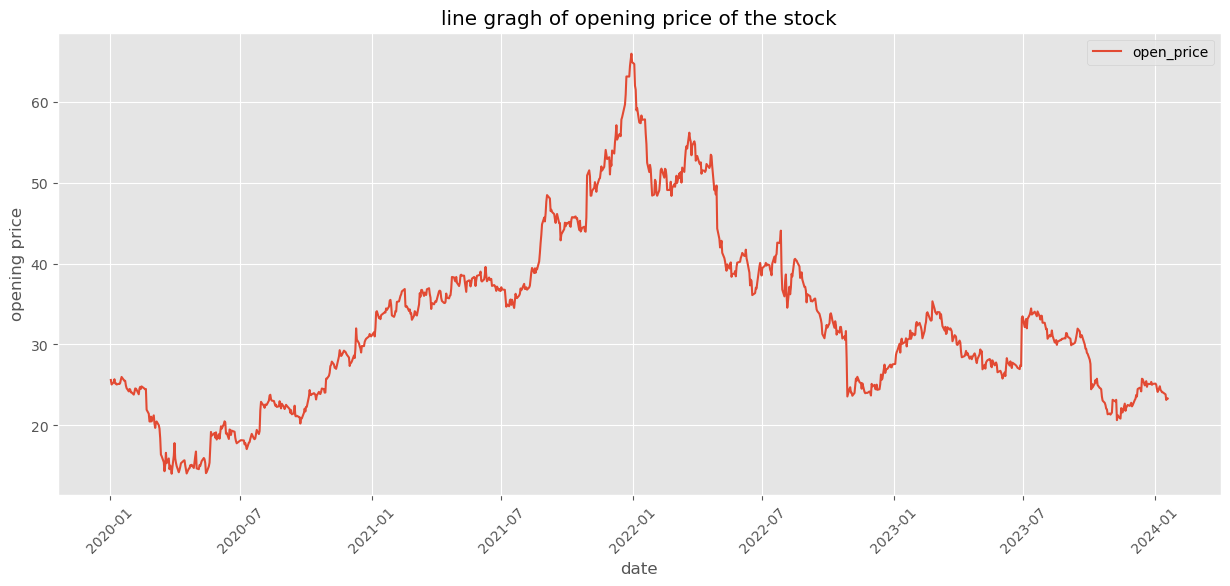

In [21]:
plt.figure(figsize = (15,6))
plt.plot(data["Open"])
plt.title("line gragh of opening price of the stock")
plt.ylabel("opening price")
plt.xlabel("date")
plt.xticks(rotation = 45)
plt.legend(["open_price"])
plt.show()

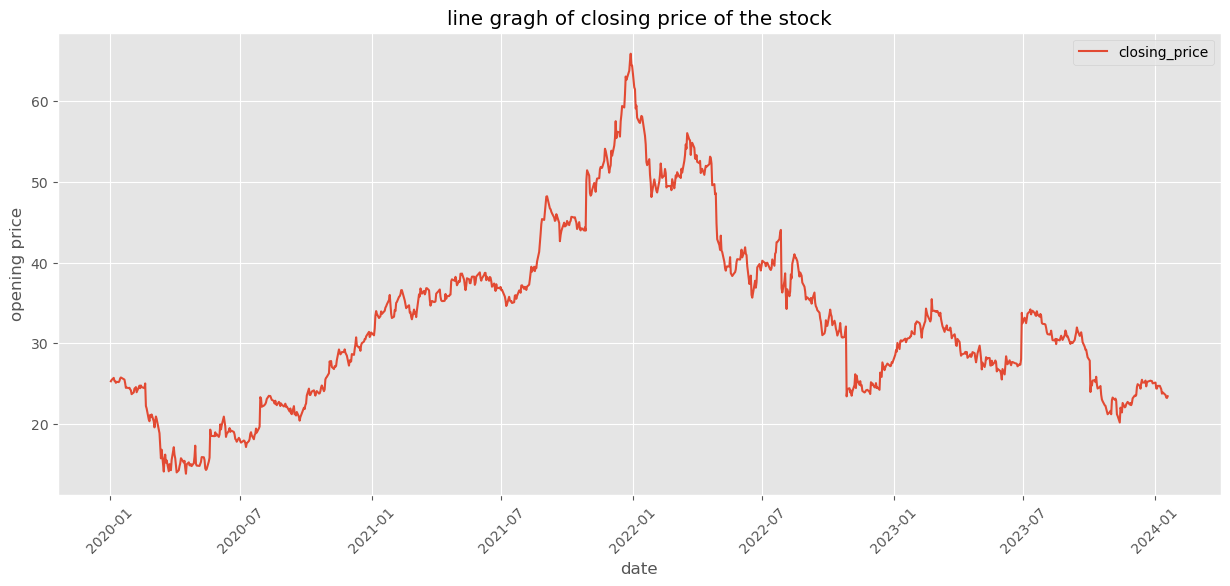

In [22]:
plt.figure(figsize = (15,6))
plt.plot(data["Close"])
plt.title("line gragh of closing price of the stock")
plt.ylabel("opening price")
plt.xlabel("date")
plt.xticks(rotation = 45)
plt.legend(["closing_price"])
plt.show()

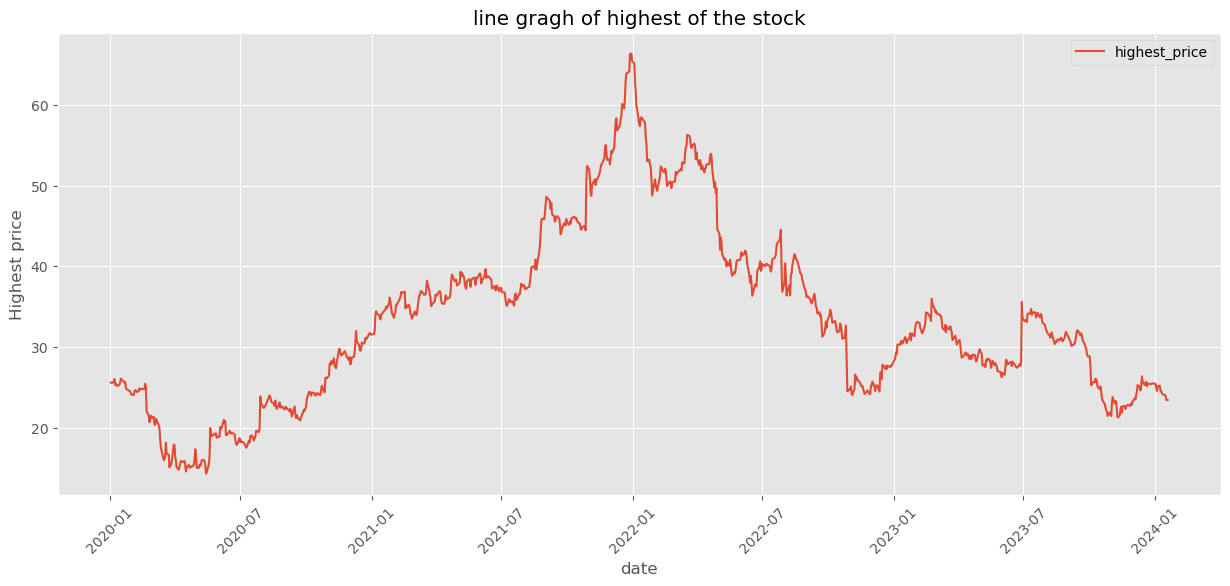

In [23]:

plt.figure(figsize = (15,6))
plt.plot(data["High"])
plt.title("line gragh of highest of the stock")
plt.ylabel("Highest price")
plt.xlabel("date")
plt.xticks(rotation = 45)
plt.legend(["highest_price"])
plt.show()

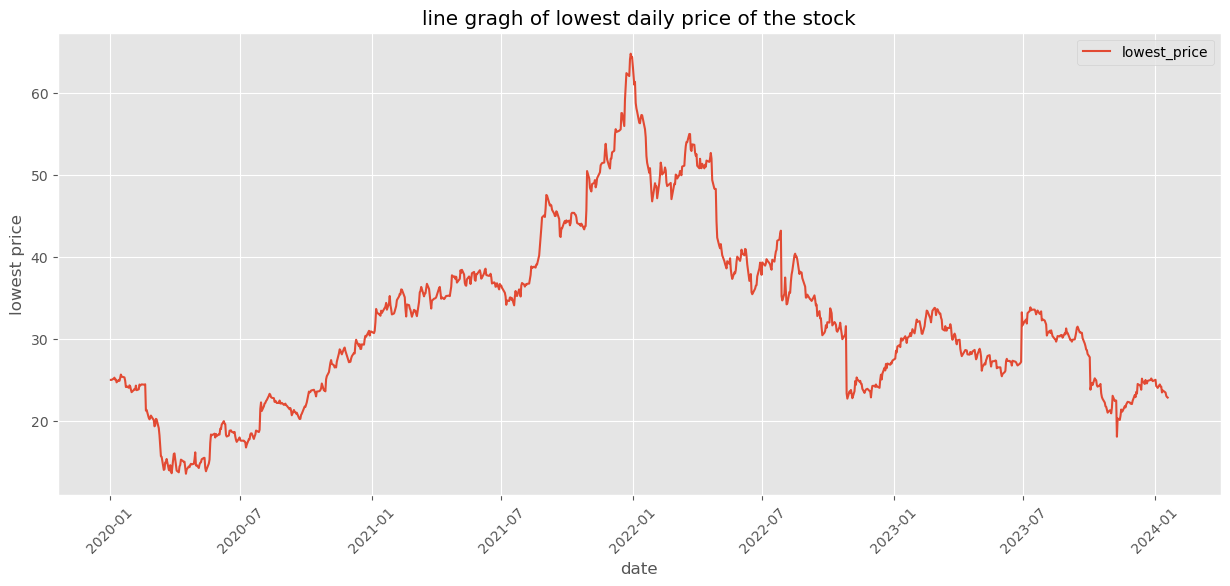

In [24]:

plt.figure(figsize = (15,6))
plt.plot(data["Low"])
plt.title("line gragh of lowest daily price of the stock")
plt.ylabel("lowest price")
plt.xlabel("date")
plt.xticks(rotation = 45)
plt.legend(["lowest_price"])
plt.show()

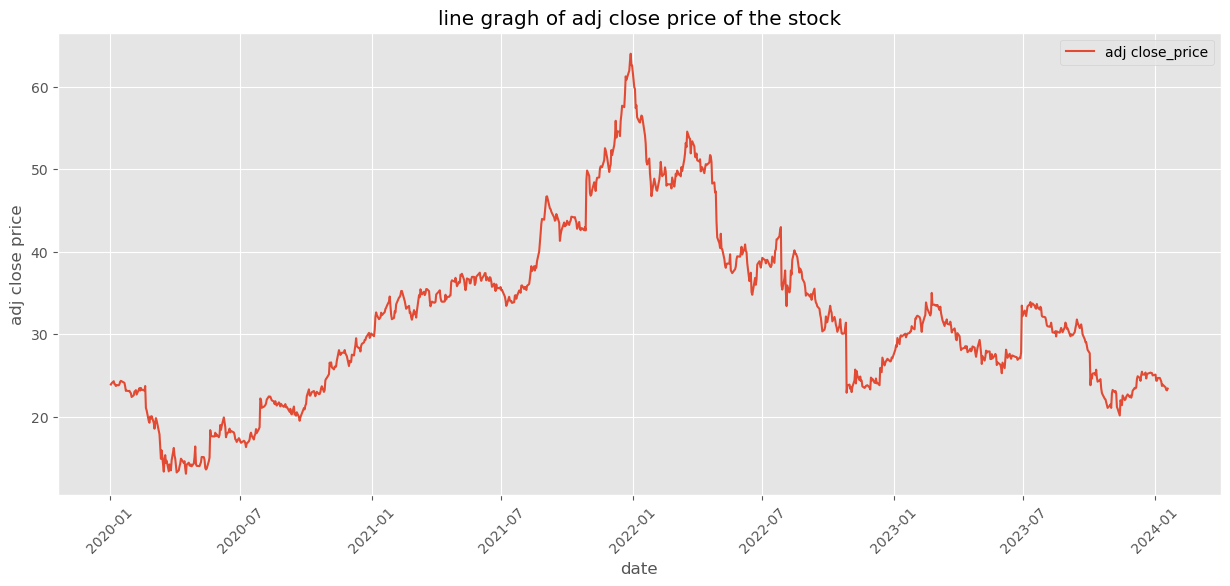

In [25]:
plt.figure(figsize = (15,6))
plt.plot(data["Adj Close"])
plt.title("line gragh of adj close price of the stock")
plt.ylabel("adj close price")
plt.xlabel("date")
plt.xticks(rotation = 45)
plt.legend(["adj close_price"])
plt.show()

Since the trend is the same for all columns we will use Adj_Close for this timeseries analysis. We shall use this because it takes to account of dividends, stock splits, and new stock offerings.

In [26]:
#Upsampling the Adj close to weakly mean
stock_price  = data["Adj Close"].resample("W-MON").asfreq()
stock_price.head()

Date
2020-01-06    24.305405
2020-01-13    23.813437
2020-01-20          NaN
2020-01-27    23.103855
2020-02-03    22.602417
Freq: W-MON, Name: Adj Close, dtype: float64

In [27]:
# checking missing valuea
stock_price.isna().sum()

26

To fill the mising value we shall forward fill. This is because the best way to predict tommorrows price is using todays price

In [28]:
stock_price.ffill(inplace = True)

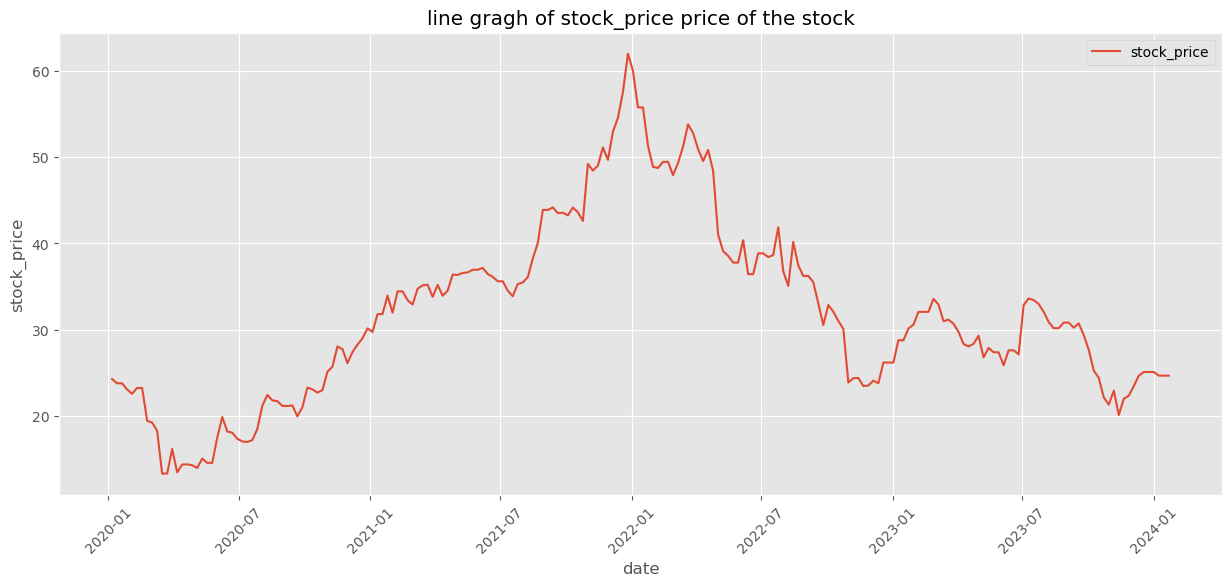

In [29]:
plt.figure(figsize = (15,6))
plt.plot(stock_price)
plt.title("line gragh of stock_price price of the stock")
plt.ylabel("stock_price")
plt.xlabel("date")
plt.xticks(rotation = 45)
plt.legend(["stock_price"])
plt.show()

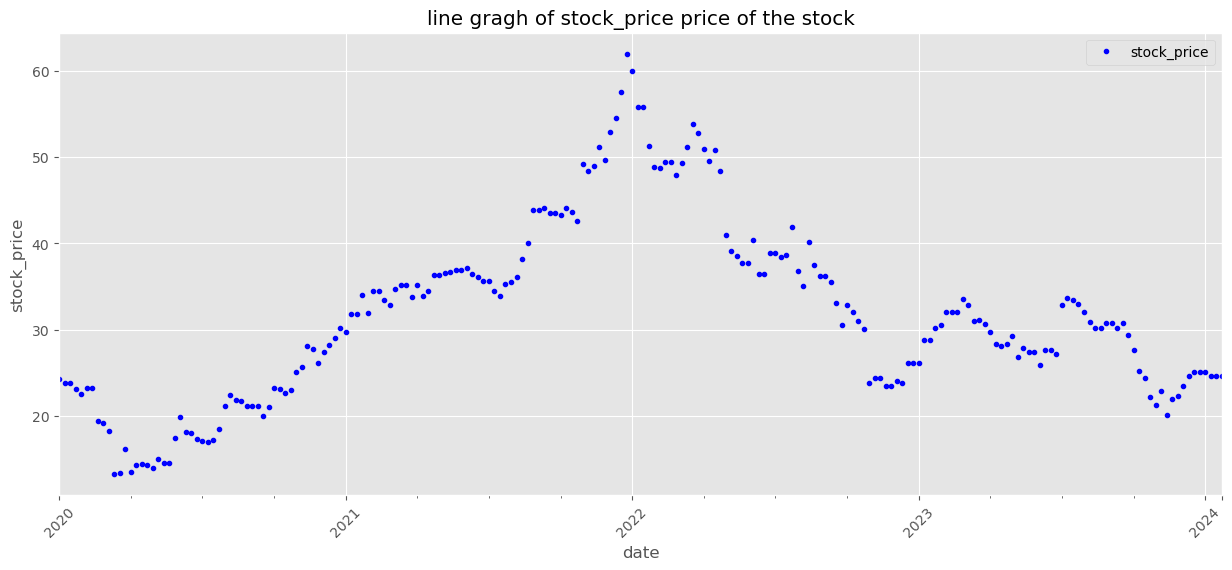

In [30]:
plt.figure(figsize = (15,6))
stock_price.plot(style = ".b")
plt.title("line gragh of stock_price price of the stock")
plt.ylabel("stock_price")
plt.xlabel("date")
plt.xticks(rotation = 45)
plt.legend(["stock_price"])
plt.show()

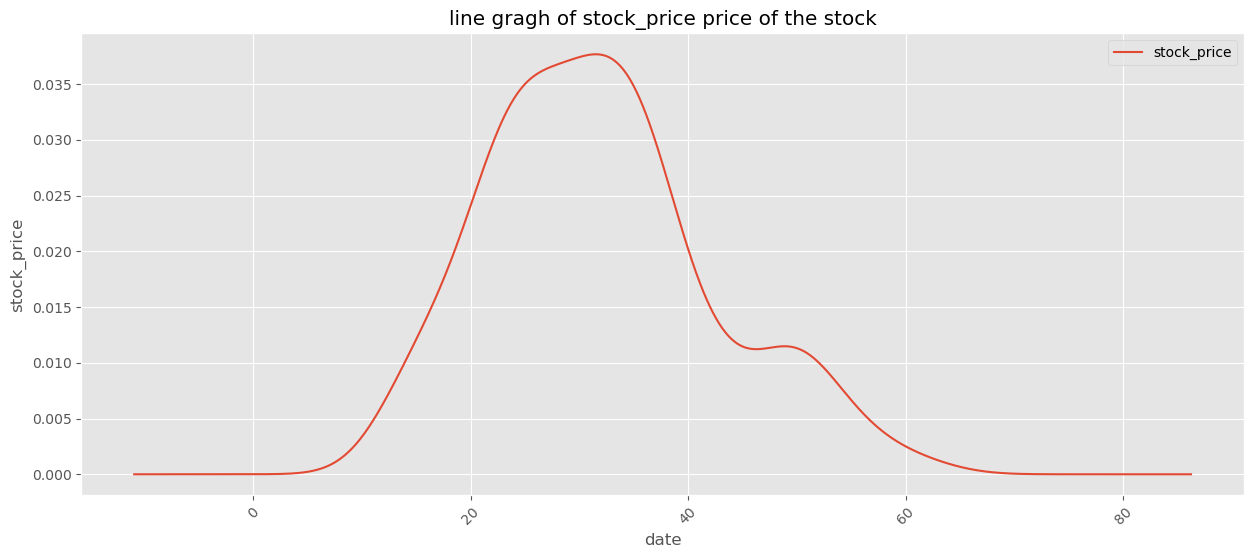

In [31]:
plt.figure(figsize = (15,6))
stock_price.plot(kind = "kde")
plt.title("line gragh of stock_price price of the stock")
plt.ylabel("stock_price")
plt.xlabel("date")
plt.xticks(rotation = 45)
plt.legend(["stock_price"])
plt.show()

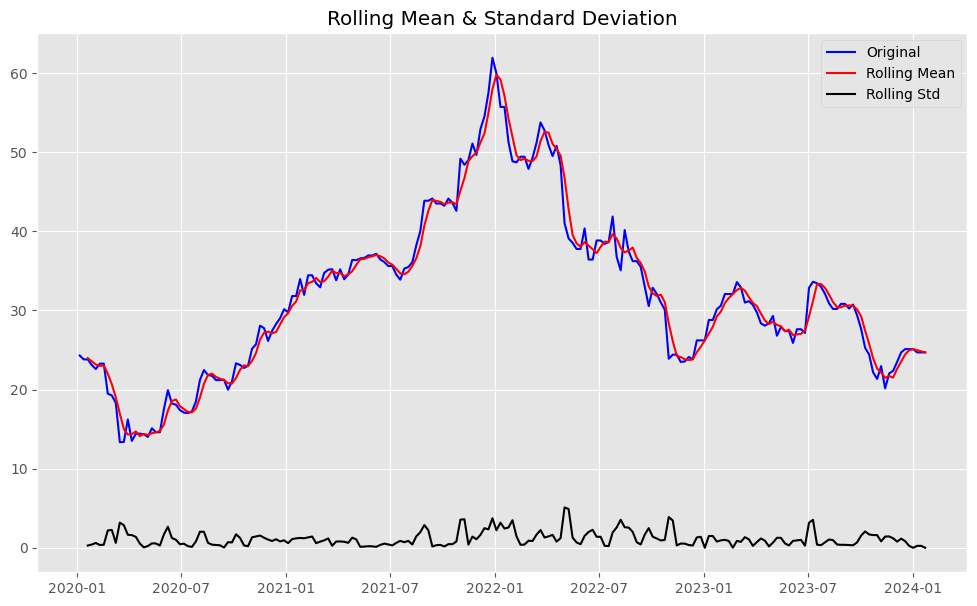

In [32]:
roll_mean = stock_price.rolling(window=3, center=False).mean()
roll_std = stock_price.rolling(window=3, center=False).std()
fig = plt.figure(figsize=(12,7))
plt.plot(stock_price, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The red and black lines represent the rolling mean and rolling standard deviations. You can see that the mean cannot be defined with certinity to be constant over time, so we can reconfirm our conclusion using ducker fuller test.

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
dcf_test = adfuller(stock_price)

In [35]:
dcf_test

(-1.6653686445500557,
 0.4490380722886087,
 3,
 208,
 {'1%': -3.4621857592784546,
  '5%': -2.875537986778846,
  '10%': -2.574231080806213},
 779.4011840940846)

In [36]:
output = pd.Series(dcf_test[0:4],index = ["Test_Statistic","P_value","lag_used","No of obsevations"])
for key,value in dcf_test[4].items():
     output['Critical Value (%s)' %key] = value

In [37]:
output

Test_Statistic           -1.665369
P_value                   0.449038
lag_used                  3.000000
No of obsevations       208.000000
Critical Value (1%)      -3.462186
Critical Value (5%)      -2.875538
Critical Value (10%)     -2.574231
dtype: float64

The null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. <p> since the 
Test_Statistic is -1.665369 which is less than the p value reject the null hypotesis and conclude that the timeseries is stationary.